# <center> Project: **Customer Intelligence** department in a Bank company: real world examples of a **Data Scientist** in a Bank company.
## <center> Part I: customer segmentation and loan/credit prediction


# Project goals:
In this project, we are going to develop and apply different unsupervised and supervised Machine Learning techniques we have learnt during this course. This project has several objectives to introduce you in a real world use case as a future data scientist.

We work in the customer intelligence area of a bank company as a data scientist. In the financial sector (but also in general in any company) fraud detection and customer credit score are key in order to determine the risk before granting a loan. Complementary, bank companies usually qualify the asset (e.g. a house, a vehicle, etc...) that the customer pretends to buy in order to evaluate the risk that the credit cannot be payed back. 

Therefore, as a Customer Intelligence team member, you will be responsible for designing, developing and analyzing the **intelligence** to lead the business of our Bank company.


In particular:

- You will apply unsupervised learning to cluster a customer base in order to "understand" the main patters and features of the **groups** or **segments**. Customer segmentation is a very useful tool and crucial in any **data-driven** company. 

- You will also apply supervised learning to develop a model able to classify customers between high and low risk of default in case of receiving a credit or loan. 

- You will develop a regression model in order to determine an objective price for second hand vehicles, due to they are one of main reasons because our customers request a credit

- As a bonus track we will complement the previous model as a classification stage that split between trucks (usually for professional customers) and cars (usually for particular customers) based on images.


To solve all these questions we will follow a common framework or way-of-working in Machine Learning projects: the **Machine Learning Operations (MLOps) life-cycle**. This framework is a common procedure in order to guarantee all stages in end-to-end Machine Learning project are covered: from the business problem understanding until to operation and maintenance of a solution.

<img src='https://drive.google.com/uc?id=1EG0doe2ryshTGqoD5IsAJqZtOppDHNVT'>



source: https://towardsdatascience.com/a-beginner-friendly-introduction-to-mlops-95282f25325c#aabc

### Due date: check Aula Global.

# **Part 0: Introduction to MLOPS**

In the past, Machine Learning projects were not as widely deployed as today, mainly due to the lack of a robust and end-to-end procedure that covers all key stages of a project: from the design to maintenance and evolution of the solution. Today we can find several definitions of MLOps but some of the most common are:

(1) "MLOps is a paradigm, including aspects like best practices, sets of concepts, as well as a development culture when it comes to the end-to-end conceptualization, implementation, monitoring, deployment, and scalability of machine learning products" [Kreuzberger, D., Kühl, N., &Hirschl, S. Machine learning operations (mlops): Overview, definition, and architecture, 2022. doi:10.48550.arXiv preprint arXiv.2205.02302]

(2) "We can use the definition of Machine Learning Engineering (MLE), where MLE is the use of scientific principle, tools, and techniques of machine learning and traditional software engineering to design and build complex computing systems. MLE encompasses all stages from data collection, to model building, to make the model available for use by the product ot the consumers." (by A. Burkov) [https://ml-ops.org/content/motivation#mlops-definition]

MLOps life-cycle consists mainly in three steps:
- **Design process**, that involves the definition of the use case problem and the main requirements in terms of production and maintenance.
- **Model development**, that includes all the data and model engineering
- **Operations process**, includes model deployment, monitoring and maintenance.

This MLOps life-cycle follows a workflow or framework that specifies the concrete activities that take part of it:

(1) **Business problem**: In any ML project is crucial to define the business problem or use case. A wrong definition will imply a failure in any of the next stages. To address this part of the workflow there are different several tools and ML canvas that facilitates the high-level description and main aspects of the system. An example of ML canvas could be:


<img src='https://drive.google.com/uc?id=1HzSlvc4w4wYXSJp1-OPy2mBt0LDjHpYV'>

(2) **Data engineering or Data wrangling**: It consists on all data process ,management: from data gathering or ingestion until data understanding and preparation. This stage uses to require more than 50% of the human resources and it is crucial for the modelling stage. 
- (a) data ingestion or gathering: implies to access IT systems to get the data sources and creating a dictionary to describe the variables that are part of these data sources.
- (b) **Exploratory Data Analysis**: implies a statistics analysis of the data including the usage of several visualization techniques as correlation matrix, boxplots, outliers identification, etc.... Data understanding will facilitate the identification of the most relevant data to our purpose.
- (c) **Data cleaning and preparation**: removing outliers, null management, categorical variables encoding,... are examples of main activities included in this sub-stage.

(3) **Modelling or ML Model Engineering**: it includes model training, evaluation, testing and insights generation. As an output of this stage of the workflow, the ML model is packaged as a final step before been deployed in our ML infrastructure.
- (a) Model training implies the selection of the technique or combination of techniques that suits better for the use case. Feature engineering is also included.
- (b) Model evaluation and test: allows to determine the perfomance of the trained model and decide if it is good enough to our use case.
- (c) insight generation: Once the model is trained and validated its performance, in this sub-stage we go back to our initial stage (i.e. business problem) to ensure that it meets the business objectives defined as use case. 
- (d) Model packing: Once the built ML has been validated and tested, the model is ready to be exported to the infrastructure responsible for executing, monitoring and maintenance.

(4) **Code engineering**: in this final stage of the MLOps workflow the model is deployed into production where performance monitoring and logging is done. The subtasks are:
- (a) Model serving: it refers to how the model is integration of the final application or software. This integration could be done via API, on-demand serving, pre-calculated, etc.... The deployment of the model could be via a docker container in cloud or local or as a serveless function.
- (b) Model monitoring and logging: it refers to the periodic observation of the ML performance and comparision with original trained one. In case of large deviation, this sub-stage will generate an alarm or warning previous to the returning to previous stages to re-train the model. The performance of the model are saved in a log record to be analyzed.


In this project, we will focus on the **business problem**, **data engineering** and **data modelling** stages of the MLOps workflow:

<img src='https://drive.google.com/uc?id=1HgG4ROiY5eqIVlNinaa21HoshLQZZWIq'>




*******

# **Part I: Customer segmentation and load prediction**
In this first part of the project, we will apply unsupervised learning to cluster the Bank's customer base. We will learn how to apply the clustering using Python and how to use the clustering to generate insights about our customer base, i.e. identify the main types or **sterotypes** of customers and their differences. Besides, we will learn how to choose among different clusterings based on their quality.

## Step 0. Understanding the problem: customers' stereotypes 

As a data scientist in the **Customer Intelligence** department of a Bank company, we are responsible for identified the main **patterns** or **stereotypes** of our customer base. These **stereotypes** can be used for several purposes: from marketing campaigns to bank operations as acceptance or deney of credits or loans.
 

To develop this customer segmenation, we are going **to apply unsupervised learning** and more specifically the two of the most important clustering techniques: K-means and Mixture of Gaussians (MoG).**


# Step 1: Data gathering


In this practice we are using a new dataset named `loan_prediction.csv`. This file contains information of **613 of our bank's consumers** that were accepted or denied to receive a loan in the past. In particular, the detailed information for each customer is:

- *Loan_ID*: It's an integer that identifies any cuatomer.
- *Gender*: Male or female
- *Married*: Yes or No
- *Dependents*: Number of people that depends on the Loan_ID
- *Education*: Level of education (graduate or not-graduate) of the Loan_ID
- *Self_Employed*: Yes or No
- *ApplicantIncome*: Monthly income (€) of the Loan_ID
- *CoapplicantIncome*: Monthly income (€) of the Loan_ID's coapplicant in case of existing
- *LoanAmount*: Monthly quantity (€) of the loan
- *Loan_Amount_Term*: Duration of the loan
- *Credit_History*: It takes value 1 if the loan_id requested a loan in the past and 0 if he/she didn't
- *Property_Area*: Type of location of the property: Urban, Semiurban or Rural
- *Loan_Status*: Yes or No and it refers that the loan request was accepted or denied.

# Step 2: Data understanding and preparation

Once we know the problem to solve, the next stage is to have a clear understanding of the data we have extracted and to prepare it before modelling. In particular, we will:
- List and verify the type of each variable (object, float, int...). Identify variables with nulls. Measure the memory usage
- Eliminate rows with nulls in order to have a dataset 100% fulfilled
- Aggregate rows with monthly expense per customers in order to have just 1 sample per customers
- Exploratory Data Analysis to understand main statistics (mean, standard deviation, min&max values and 25%-50%-75% quartiles) and distribution of the most relevant variables or features as data usage, voice usage, monthly expense and number of lines
- Plot several graphs in order to identify how variables are related between them. In particular:
- correlation matrix
- 2D and 3D scatter plots between data usage, voice usage and monthly expense

Once this part, also known as **data wrangling** of the Project is done, we should achieve a deep knowledge about the data. Besides, the dataset will have been processed to be ready to apply the clustering algorithms to solve the business problem.

Let's import the main Python libraries required in our project.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation


#%matplotlib notebook
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits import mplot3d
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from graphviz import Source
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve


### **[EX0]** Open the `csv` with separator "," and assign it to a dataframe variable (use `read_csv` from Pandas library). Show the top 5 elements.

In [2]:
loan_data = pd.read_csv('loan_prediction.csv')
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### [**EX1**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which is the variable with more nulls? And with no nulls? 

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

Podemos observar a que Credit_History es la variable con mas Nulls. A diferencia de esto, podemos observar que Loan_ID, Education, ApplicantIncome, CoapplicantIncome, Property_Area y Loan_Status son los que menos nulls tienen.

We should guarantee that our dataset for training the cluster has no **nulls** in those variables.  

### [**EX2**] Eliminate those rows with nulls in any of variables. We will use this new dataset from now for the rest of the project.



In [4]:
# pandas.dropna: Remove all rows with NULL values from the DataFrame.
customer_dt = loan_data.dropna()

Let's re-calculate the type of the variables (integer, float, chart...) and the size of the dataset and the file. Your output should look like this:

In [5]:
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In Machine Learning, it is key to understand the nature of the data before training. For numeric variables, it is useful to calculate the distribution and main statistics.

### [**EX3**] Calculate the main statistics (max, min, mean, median and standard deviation) of numerical variables. Plot a histogram for each of these variables

Tip: use [Seaborn library](https://seaborn.pydata.org/) with `kde=True` to create a histogram. You also can use **dataframe_column.histplot(bins=number_of_bins)**

In [6]:
#Maximum
data_max = customer_dt.max(numeric_only=True)
print(data_max)

ApplicantIncome      81000.0
CoapplicantIncome    33837.0
LoanAmount             600.0
Loan_Amount_Term       480.0
Credit_History           1.0
dtype: float64


In [7]:
#Minimum
data_min = customer_dt.max(numeric_only=True)
print(data_min)

ApplicantIncome      81000.0
CoapplicantIncome    33837.0
LoanAmount             600.0
Loan_Amount_Term       480.0
Credit_History           1.0
dtype: float64


In [8]:
#Mean
data_mean = customer_dt.mean(numeric_only=True)
print(data_mean)

ApplicantIncome      5364.231250
CoapplicantIncome    1581.093583
LoanAmount            144.735417
Loan_Amount_Term      342.050000
Credit_History          0.854167
dtype: float64


In [9]:
#Median
data_median = customer_dt.median(numeric_only=True)
print(data_median)

ApplicantIncome      3859.0
CoapplicantIncome    1084.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64


In [10]:
#Standar Deviation
data_std = customer_dt.std(numeric_only=True)
print(data_std)

ApplicantIncome      5668.251251
CoapplicantIncome    2617.692267
LoanAmount             80.508164
Loan_Amount_Term       65.212401
Credit_History          0.353307
dtype: float64


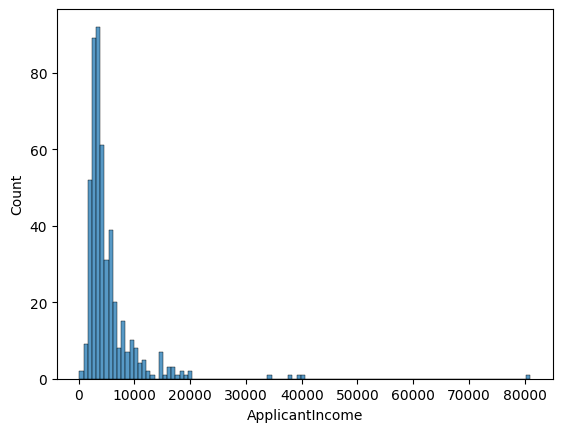

In [11]:
#sns.histplot(customer_dt.loc[:, "ApplicantIncome"], bins=18, kde=True)
sns.histplot(data=customer_dt, x="ApplicantIncome"); plt.show()

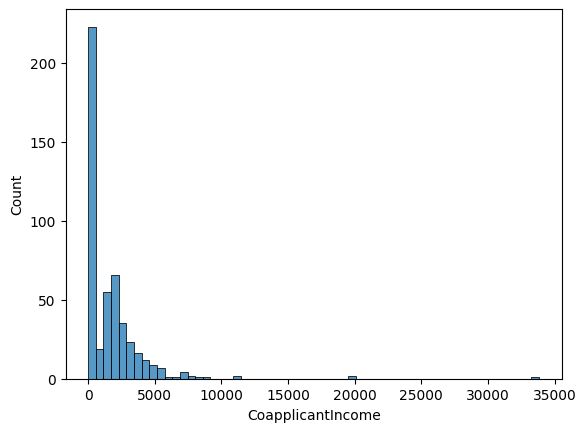

In [12]:
sns.histplot(data=customer_dt, x="CoapplicantIncome"); plt.show()

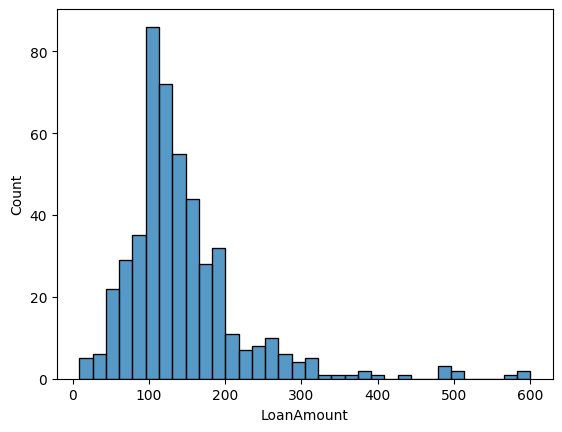

In [13]:
sns.histplot(data=customer_dt, x="LoanAmount"); plt.show()

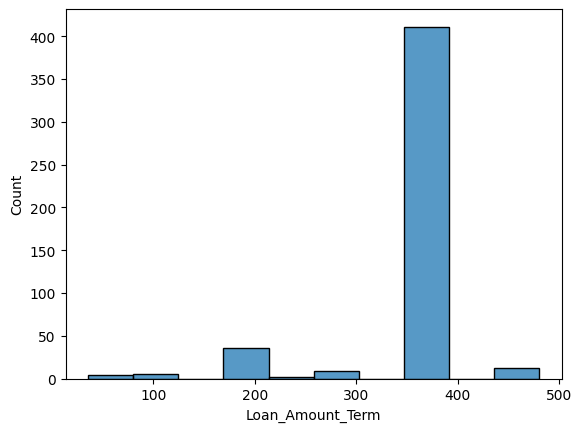

In [14]:
sns.histplot(data=customer_dt, x="Loan_Amount_Term"); plt.show()

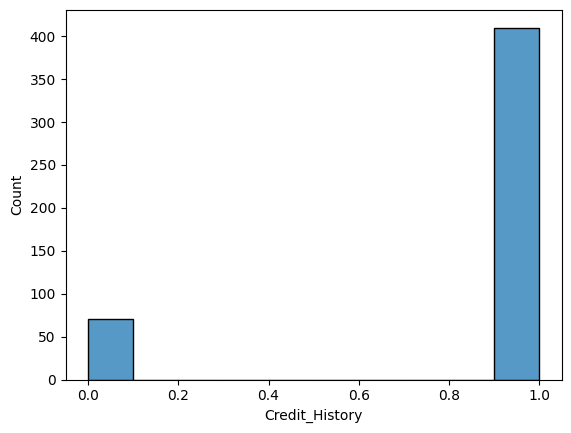

In [15]:
sns.histplot(data=customer_dt, x="Credit_History"); plt.show()

### **[EX4]** Create a box plot for the `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`variables. Do you identify any outlier? Justify your answer.


In [16]:
quartiles = customer_dt.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)


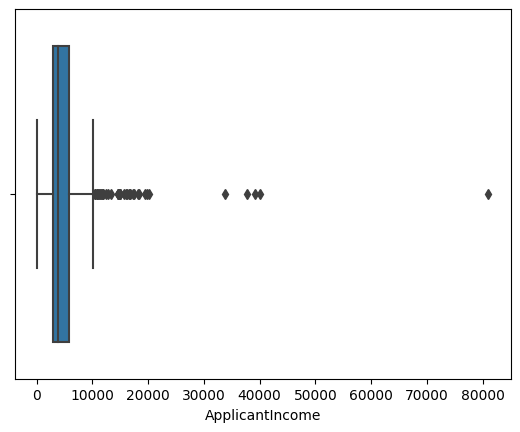

In [17]:
sns.boxplot(data=customer_dt, x="ApplicantIncome"); plt.show()

In [18]:
#Applicant Income Upper Bound:
iqrAI = quartiles["ApplicantIncome"][0.75]-quartiles["ApplicantIncome"][0.25]
print(quartiles["ApplicantIncome"][0.75] + 1.5*iqrAI)

10283.125


Podemos identificar a los outliers a partir del applicant income de 10283.125, que es el valor que tiene el upperbound calculado por la regla del 1.5IQR.

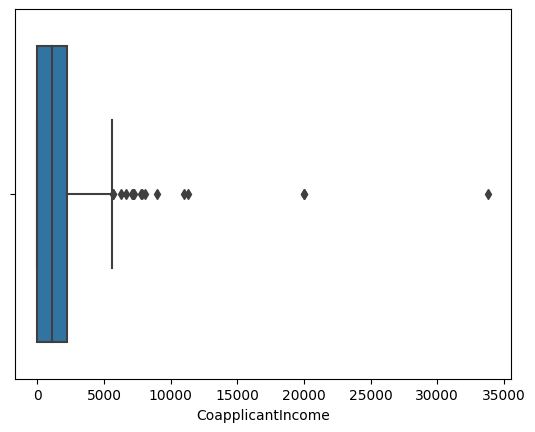

In [19]:
sns.boxplot(data=customer_dt, x="CoapplicantIncome"); plt.show()

In [20]:
#Coapplicant Income Upper Bound:
iqrCAI = quartiles["CoapplicantIncome"][0.75]-quartiles["CoapplicantIncome"][0.25]
print(quartiles["CoapplicantIncome"][0.75] + 1.5*iqrCAI)

5633.125


Podemos identificar los outliers a partir del límite superior definido por la regla del 1.5IQR, que tiene valor 5633.125.

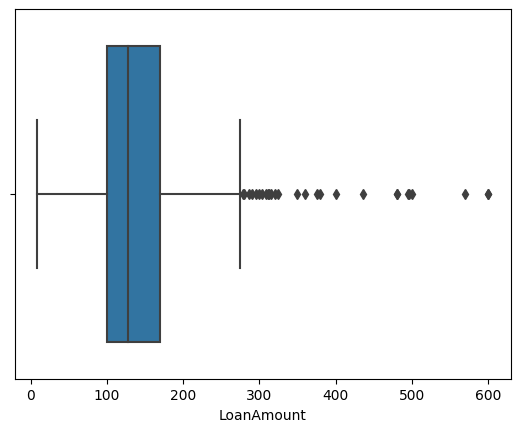

In [21]:
sns.boxplot(data=customer_dt, x="LoanAmount"); plt.show()

In [22]:
#Applicant Income Upper Bound:
iqrLA = quartiles["LoanAmount"][0.75]-quartiles["LoanAmount"][0.25]
print(quartiles["LoanAmount"][0.75] + 1.5*iqrLA)

275.0


Podemos identificar los outliers a partir del límite superior definido por la regla del 1.5IQR, que tiene valor 275.

Additionally to understanding each individual variable, it is important to understand how they are related to each other. 

### [**EX5**] Calculate and plot the correlation matrix between customer attributes (i.e. `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term` and `Credit_History`. 
- Which are the variables with more and less absolute correlation with respect to the `ApplicantIncome` variable?
- Which are the top 2 variables with highest correlation between them?
-and lowest?

Tip: use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

Another option to analyze the relation 1-to-1 between 2 variables in through scatter plots. Let's simplify the original dataset and create a new `training_dt`dataset with only `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`.

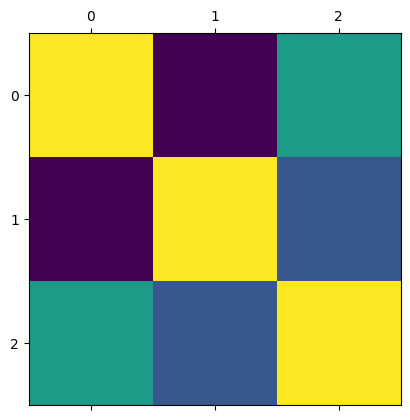

In [23]:
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
training_dt.head()


plt.matshow(pd.DataFrame.corr(training_dt)); plt.show()

Podemos observar una mayor correlacion entre Applicant Income (index 0) y Loan Amount (index 2)

### [**EX6**] Visualize a scatter plot with `ApplicantIncome` vs `Loan_Amount` variables. Could you visually identify any cluster? How many?

Si, podemos visualizar un cluster estirado de forma vertical. Sin embargo, este cluster probablemente se vea muy chafado si lo ploteamos con la misma escala en las dos variables, viendose realmente como un cluster estirado de forma horizontal.

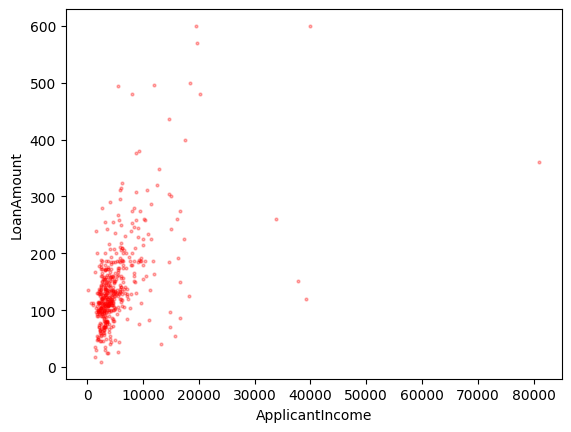

In [24]:
plt.scatter(training_dt['ApplicantIncome'], training_dt['LoanAmount'], s=4, color="red", alpha=0.3)
plt.xlabel('ApplicantIncome'); plt.ylabel('LoanAmount')
plt.show()

### [**EX7**] Visualize a scatter plot with `ApplicantIncome` vs `CoapplicantIncome` variables. Could you visually identify any cluster? How many?

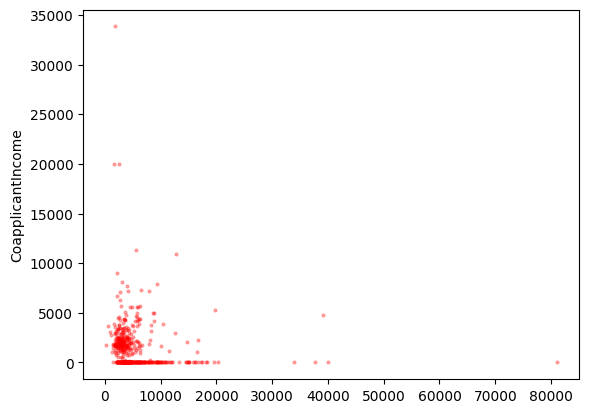

In [25]:
plt.scatter(training_dt['ApplicantIncome'], training_dt['CoapplicantIncome'], s=4, color="red", alpha=0.3)
plt.ylabel('CoapplicantIncome')
plt.show()

### [**EX8**] Visualize a scatter plot with `ApplicantIncome` vs `CoapplicantIncome` variables which values are below 20000 and over 0 respectively. Could you visually identify any cluster? How many?

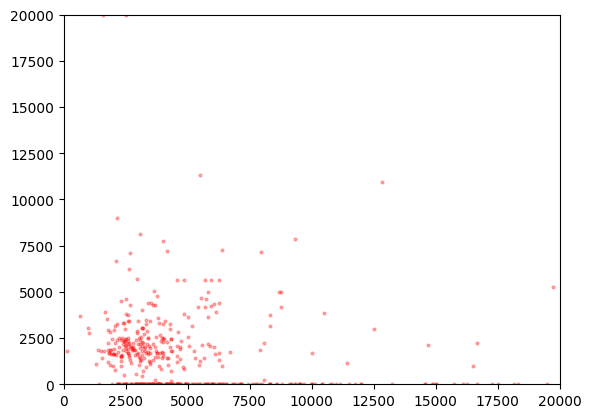

In [26]:
plt.scatter(training_dt['ApplicantIncome'], training_dt['CoapplicantIncome'], s=4, color="red", alpha=0.3)
plt.xlim(0, 20000); plt.ylim(0,20000)
plt.show()

### **[EX9]** Which type of clustering technique will fit better to this dataset? Justify your answer.

En el ultimo caso, probablemente un k-means con k = 1 funcionará, ya que se expande de forma similar del centro en ambas direcciones.
En el primer caso, probablemente necesitemos una multivariate gaussian si despues queremos generar datos con ella de forma mas acurada, aunque como solo tenemos un cluster el k means asignaria todos los puntos al mismo cluster, siendo un caso correcto también. 

Si juntamos las variables, podemos ver como todas se acumulan cerca del origen de coordenadas.

### [**EX10**] To improve our understanding of the data, plot a 3D visualization between `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`.
- Could you visually identify any cluster? How many?
- Could you identify a cluster bigger than the others? Describe approximately it in terms of the values of these 3 variables


Tip: use [scatter3d](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create 3D scatter plots.

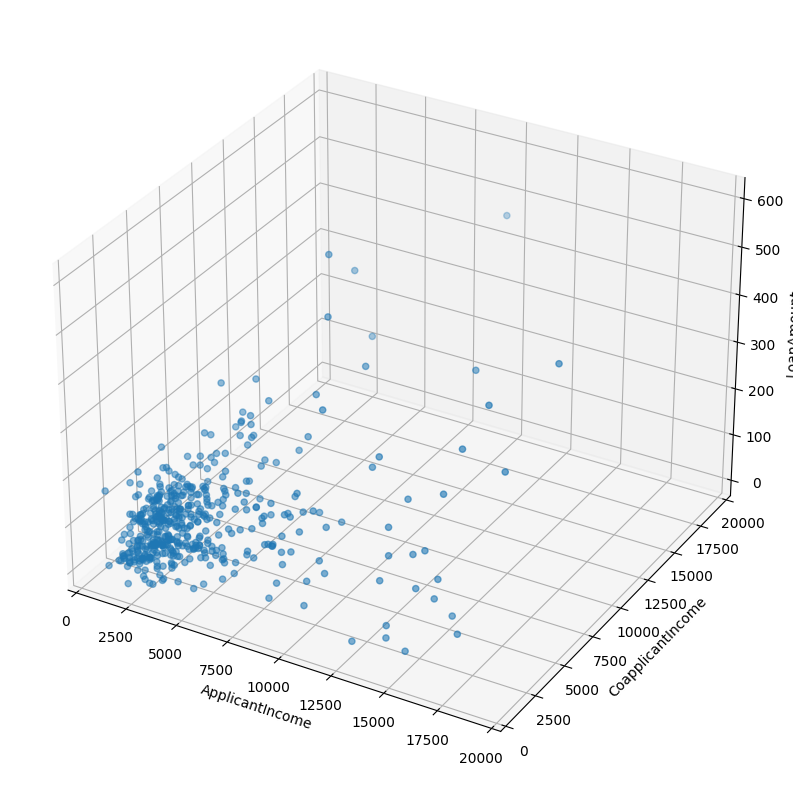

In [27]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(projection='3d')

ax.scatter(training_dt['ApplicantIncome'],training_dt['CoapplicantIncome'],training_dt['LoanAmount'])
ax.set_xlabel('ApplicantIncome'); ax.set_ylabel('CoapplicantIncome'); ax.set_zlabel('LoanAmount')
ax.set_xlim(0, 20000); ax.set_ylim(0,20000)
plt.show()


[**EX11**] Rotate the plot 2 times to visualize the plot from other perspectives. 

**[EX12]** Let's analysis the distribution of some categorical variables as: `gender`, `Marital Status`, `Education`, `Self-Employment` and `Loan_Status`
. Create a bar plot for these 4 variables.

# Step 3-1: Training the model and performance evaluation: Segmentation of customers through K-means clustering

Once the dataset has been processed and we have a first understanding of the type and characteristics of the variables, we are ready to apply clustering methods to group.
Firstly, we will code our own Kmeans algorithm. We will select `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` variables to fit the clusters.
Once the clustering is done, we need to understand the output. 2-dimension and 3-dimension scatter plot visualizations are excellent techniques to evaluate the clustering output.
To check if our Kmeans algorithm works properly, we will use the Sklearn’s Kmeans function to cluster the dataset. We will compare the 2D and 3D plots from the Sklearn clustering and ours.
Finally, as part of any Machine Learning Project, we need to calculate the perfomance of our model. For Kmeans, we will 1) estimate the optimal K value through the Elbow method and 2) calculate the sihouette score for several values of K


## Your own K-means function

[**EX13**] Build a `calculate_distance` function to calculate the distance between each point and the centroid

In [ ]:
#Solution
def calculate_distance (X, centroid):
    squareDistance=np.zeros((X.shape[0],centroid.shape[0]))
    
    ##################
    # Add your code  #
    #      HERE      #
    ##################
        
    
            
    return squareDistance

[**EX14**] Build `K_means_clustering` function that creates a clustering according to K-means methodology.

In [ ]:
#Solution
def K_means_clustering(X, n_clusters=2, seed=1, num_iterations=10):
    # Initialitize centroids based on a random selection of #n_clusters samples of X 
    rng = np.random.RandomState(seed)
    i = rng.permutation(X.shape[0])[:n_clusters] 
    centroids = X[i]
    
    #Repeat the process during num_iterations or convergence achieved
    for num in range(0,num_iterations):
    
    #For each iteration, calculate the shortest distance of each point of X to centroids
    #Labels are based on the index in the centroids array
        ##################
        # Add your code  #
        #      HERE      #
        ##################
        
        
    
    #Calculate the new centroids based on the means of each point assigned to each cluster 
        
        ##################
        # Add your code  #
        #      HERE      #
        ##################
        
        
        
    # Evaluate convergence: if new_centroids=centroids, stop iterations
        if np.all(centroids == new_centroids):
            print('Convergence achieved with:',num, 'iterations')
            break
        else:
            if num%10 == 0 and num != 0:
                print('No convergence yet after', num, 'iterations')
        centroids = new_centroids
        
    return centroids, labels

Let's define the `training_dt` dataset based on the following variables: `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`.

In [ ]:
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]

[**EX15**]Execute your `K_means_clustering` function to `training_dt` and number of clusters=3. Calculate the centroids of each cluster.

Now, it's time to understand how the clustering process works! To do it, we are plotting the `training_dt` painting the colour based on `Cluster_id`, output from the k-means. 

 [**EX16**] Plot the following scatter plots representing the centroids:
 - Between `ApplicantIncome` vs `CoapplicantIncome`
 - Between `ApplicantIncome`vs `LoanAmount` and
 - Between `CoapplicantIncome`vs `LoanAmount`


**[EX17]** According to these scatter plots, would you change the value of K? Which one and why?

[**EX18**] Execute the Sklearn library's KMeans function and compare both `Data_usage`vs `Voice_usage`scatter plots. Are they similar?

Tip: We recommend the following  [KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) parameters: `init`='random', `n_init`=10, `tol`=1e-04 and `random_state`=0

## Measuring the quality of the clustering and the optimal K: Elbow method and sihouette

The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a high dimensional dataset that cannot be visualized.

The elbow method is a useful graphical tool to estimate the optimal number of clusters. Intuitively, we can say that, if k increases, the distorsion within each cluster will decrease because the samples will be closer to their centroids. However, sometimes is not efficient to increase the **K** value because the distorsion doesn't decrease enough in comparision with the computation load required for higher **K**. 

**[EX 19]** Let's calculate the Elbow method for the previous dataset, i.e. containing only `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` variables for K values from 1 to 10.
We use [km.inertia_](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from the Sklearn library's KMeans to measure the sum of squared distances of samples to their closest cluster center. Which is the optimal value for K?

In [ ]:

# Selection of the dataset
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]
inertia = []
#Calculate the Kmeans from K=1 to 10
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0
    )
    km.fit(training_dt)
    inertia.append(km.inertia_)



# plot inertia

##################
# Add your code  #
#      HERE      #
##################

**Silhouette** is a metric to measure the *quality* of the clustering process. Clustering models with a high **Silhouette** are said to be dense, i.e. samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other. This measure has a range of [-1, 1].

[**EX20**]Calculate the `silhouette_score`value for a range of KMeans clusters from 2 to 7. The dataset to use is `training_dt`with the following variables: `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`. Which is the value of **K** with better **Silhouette**? Does it make sense taking into consideration the previous scatter plots?

Tip: use [silhouette_score](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) to calculate the silhouette score and further information.

In [ ]:
#Solution
# Selection of the dataset
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]
for j in range(2, 8):

    ##################
    # Add your code  #
    #      HERE      #
    ##################  
    
  
    
    silhouette_avg = silhouette_score(training_dt, cluster_labels)
    print("For n_clusters =", j,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.9298749966261077
For n_clusters = 3 The average silhouette_score is : 0.7119135863457139
For n_clusters = 4 The average silhouette_score is : 0.6026811181482539
For n_clusters = 5 The average silhouette_score is : 0.6211487839641464
For n_clusters = 6 The average silhouette_score is : 0.36552701297592854
For n_clusters = 7 The average silhouette_score is : 0.38300597135718967
The optimal value is K=2 because silhouette score is the largest


For a visual understanding about each cluster, we can plot the silhouette score for each sample of the dataset. Execute the following code:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

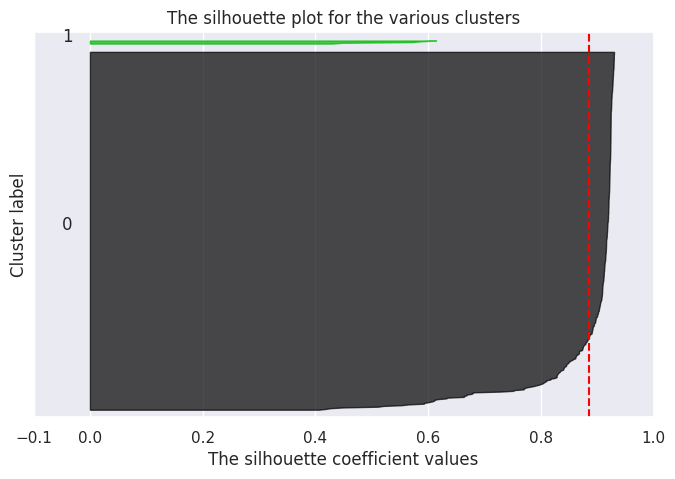

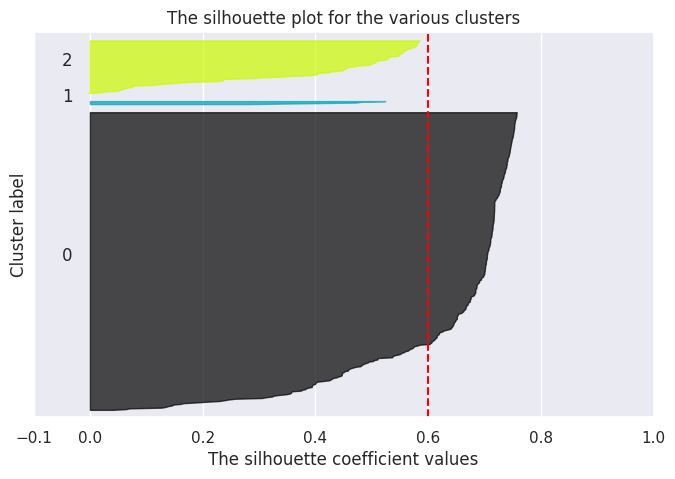

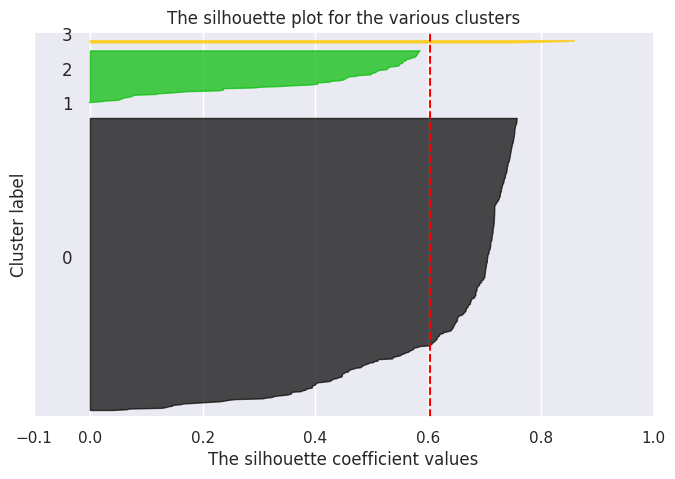

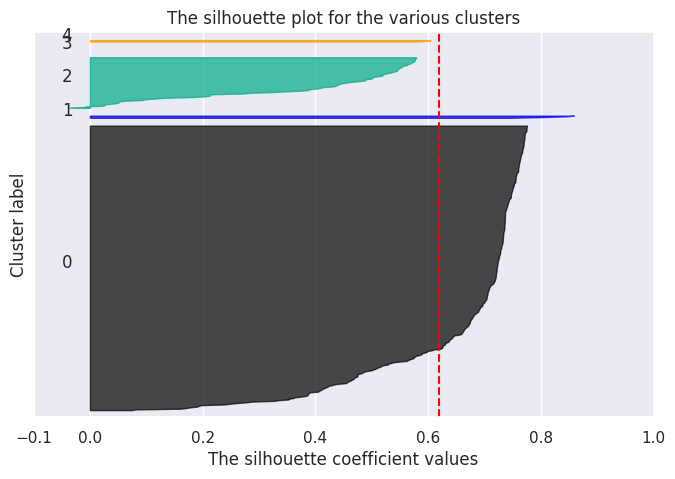

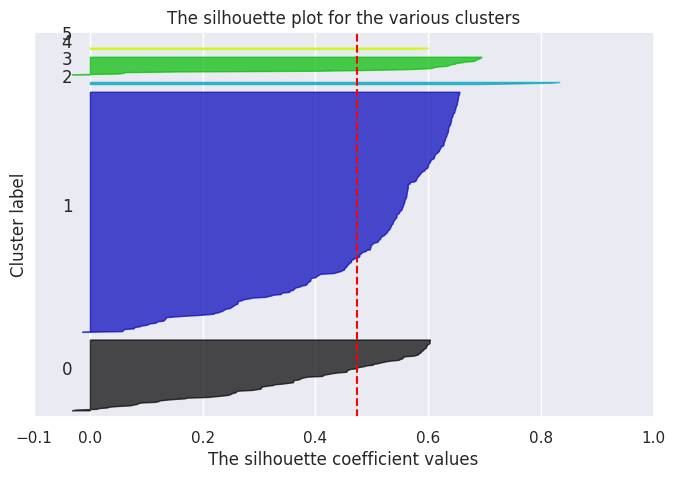

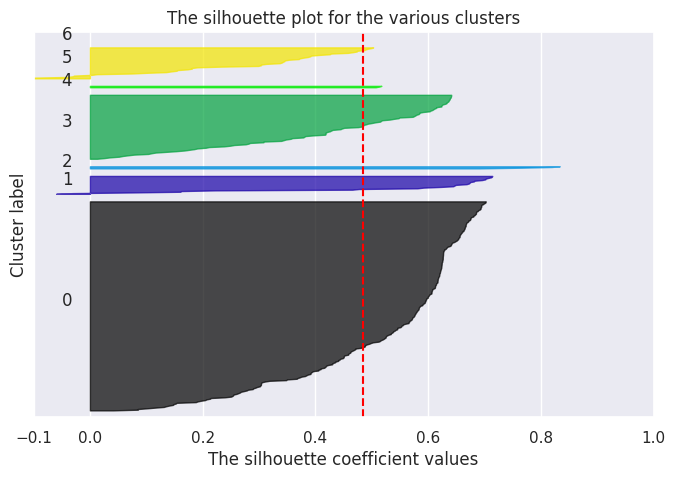

In [ ]:
# Selection of the dataset
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]
for j in range(2, 8):
    n_clusters=j
    km  = KMeans(j, random_state=10)
    cluster_labels = km.fit_predict(training_dt)
    silhouette_avg = silhouette_score(training_dt, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(training_dt, cluster_labels)
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(training_dt) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(j):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

# Step 4: Insights generation: Understanding the clustering output

Let's consider that **K=2** is good enough to cluster our customer base and generate insights for the Bank company.

[**EX21**]Repeat the K-Means clustering with **K=2** for the `training_dt`formed by `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`. For each cluster, calculate the **mean**, **standard deviation**, **min**, **max** for each variable.


In [ ]:
## Solution

training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]

training_dt['Cluster_ID_library']=-1
#Calculate the Kmeans for K=2
km = KMeans(n_clusters=2, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0)
training_dt.loc[:,'Cluster_ID_library'] = km.fit_predict(training_dt)


#Select numeric variables
data_to_describe={'ApplicantIncome', 'CoapplicantIncome','LoanAmount'}
print("Main statistics for numeric variables in cluster 0:\n", training_dt[training_dt['Cluster_ID_library']==0][data_to_describe].describe())
print("Main statistics for numeric variables in cluster 1:\n", training_dt[training_dt['Cluster_ID_library']==1][data_to_describe].describe())

Main statistics for numeric variables in cluster 0:
        CoapplicantIncome  LoanAmount  ApplicantIncome
count         454.000000  454.000000       454.000000
mean         1637.764141  137.422907      4399.931718
std          2659.334842   64.861489      2298.045998
min             0.000000    9.000000       150.000000
25%             0.000000  100.000000      2790.000000
50%          1270.000000  126.500000      3750.000000
75%          2305.000000  162.000000      5483.000000
max         33837.000000  496.000000     12841.000000
Main statistics for numeric variables in cluster 1:
        CoapplicantIncome  LoanAmount  ApplicantIncome
count          26.000000   26.000000        26.000000
mean          591.538462  272.423077     22202.384615
std          1437.999867  173.286854     14427.410559
min             0.000000   40.000000     13262.000000
25%             0.000000  131.250000     14999.250000
50%             0.000000  251.000000     16666.500000
75%             0.000000  390.

<ipython-input-33-51bdfb1174d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_dt['Cluster_ID_library']=-1
<ipython-input-33-51bdfb1174d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_dt.loc[:,'Cluster_ID_library'] = km.fit_predict(training_dt)
<ipython-input-33-51bdfb1174d4>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = n

**[EX22]** Describe with one sentence the main characteristic of every customer segment in terms of this 3 variables?


In [ ]:
print ("Cluster 0 is the largest and contains customer with lowest income for applicant and coapplicant but also the lowest loan amount. Customers that belong to cluster 1 are the ones with highest income for both applicant and coapplicant but also they ask for more loan amount")


Cluster 0 is the largest and contains customer with lowest income for applicant and coapplicant but also the lowest loan amount. Customers that belong to cluster 1 are the ones with highest income for both applicant and coapplicant but also they ask for more loan amount


# Step 3-2: Training the model and performance evaluation: Segmentation of customers through Mixture of Gaussian clustering

As we know, there are other mechanisms to cluster a dataset. Let's test how Mixture of Gaussians function from sklearn library works.

[**EX23**] Execute the Mixture of Gaussians function (with number of components=3) to `training_dt` dataset with `Voice_usage`, `Data_usage`and `Monthly_expense` variables. 
- Which is the size of each cluster? 
- Visualize the scatter plot between `Data_usage` vs `Voice_usage`. Is it similar to the resulting from K-Means and K=3?
- Visualize the scatter plot between `Data_usage` vs `Monthly_expense`. Is it similar to the resulting from K-Means and K=3?
- Visualize the scatter plot between `Voice_usage` vs `Monthly_expense`. Is it similar to the resulting from K-Means and K=3?

Tip: You may use [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) from Sklearn libray.

[**EX24**] Evaluate the **Silhouette** metric for MoG with **number of components** from 2 to 7. 

**[EX25]** Which is the number of cluster with the highest score? Which method is finally the best for our dataset?



# Step 3-3: Training the model and performance evaluation: Classification of customers to be granted a loan

 Until now, the credit risk department of our Bank defined and applied the criteria to approve or deny a loan. However, this criteria is differently applied between their members that belong to the risk department. To solve this situation and to have and apply a common criteria, our Customer Intelligence area has been requested to design and implement an algorithm to classify between loan request to be accepted or denied.

**[EX26]** Convert categorical columns to numerical using one-hot encoding and drop `Loan_ID`column. You should obtain something similar to:


In [ ]:
customer_dt_encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
customer_dt_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          480 non-null    int64  
 1   CoapplicantIncome        480 non-null    float64
 2   LoanAmount               480 non-null    float64
 3   Loan_Amount_Term         480 non-null    float64
 4   Credit_History           480 non-null    float64
 5   Loan_Status              480 non-null    object 
 6   Gender_Female            480 non-null    uint8  
 7   Gender_Male              480 non-null    uint8  
 8   Married_No               480 non-null    uint8  
 9   Married_Yes              480 non-null    uint8  
 10  Dependents_0             480 non-null    uint8  
 11  Dependents_1             480 non-null    uint8  
 12  Dependents_2             480 non-null    uint8  
 13  Dependents_3+            480 non-null    uint8  
 14  Education_Graduate       4

**[EX27]** Split the data into: a) into features (X) and target(i.e. `Loan_Status`) (y) and b) training (80% of total dataset) and test sets (20% of total dataset)

### 3.3.1 Baseline of models: Training and evaluation

[**EX28**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Visualize the Decision Tree using tree.export_graphviz.
- Train a second Decision Tree with the following hyperparameters: `max_depth`=5, `min_samples_split`=5, `min_samples_leaf`=5, `random_state`=42. Calculate **precision**, **recall**, **accuracy** and the **confusion matrix**. Has the performance improved? 

[**EX29**] Train the Logistic Regression algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Logistic Regression algorithm working better than DT? Why?

[**EX30**] Scale the numerical columns using StandardScaler function. Train again the Logistic Regression algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Logistic Regression algorithm working better than the previous LR? Why?

In [ ]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX31**] Train a Decision Tree and Logistic Regression algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

Tip 2: You may use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to evaluate

In [ ]:
#Models definition
models=[]
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('Decision_trees', DecisionTreeClassifier()))
#Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
for name_model, model in models:
#Solution

    
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())


#boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 3.3.2 Improving the model using ensembling models: voting, bagging and boosting

The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX32**] Build a **voting** ensemble formed by a Logistic Regression and Decision Tree. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [ ]:
# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=1000)
estimators.append(('LR', model1))
model2 = DecisionTreeClassifier()
estimators.append(('DecisionTree', model2))

# create the ensemble model
#Solution



y_pred_ensemble=ensemble.predict(X_test)
print("*********************************** VOTING ENSEMBLE*****************************************")
result_ensemble=ensemble.score(X_test, y_test)
print("Accuracy:", result_ensemble)
matrix_ensemble=confusion_matrix(y_test, y_pred_ensemble)
print("Confusion matrix:\n", matrix_ensemble)
report_ensemble=classification_report(y_test, y_pred_ensemble)
print(report_ensemble)

### Bagging ensemble: Random Forest

[**EX33**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

It is also important to evaluate the probabilities distribution of the prediction. Execute this code to plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

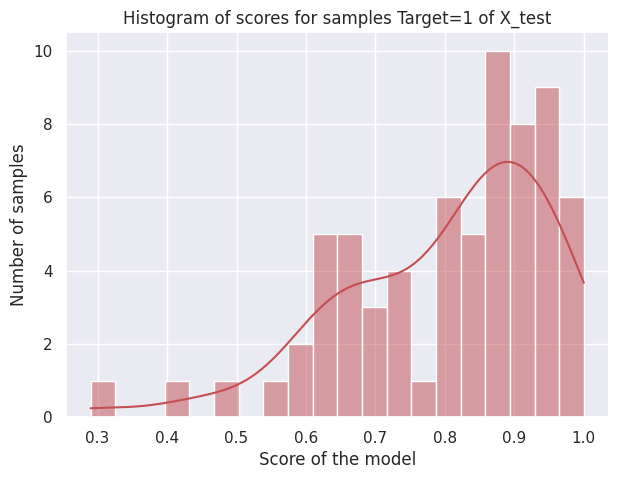

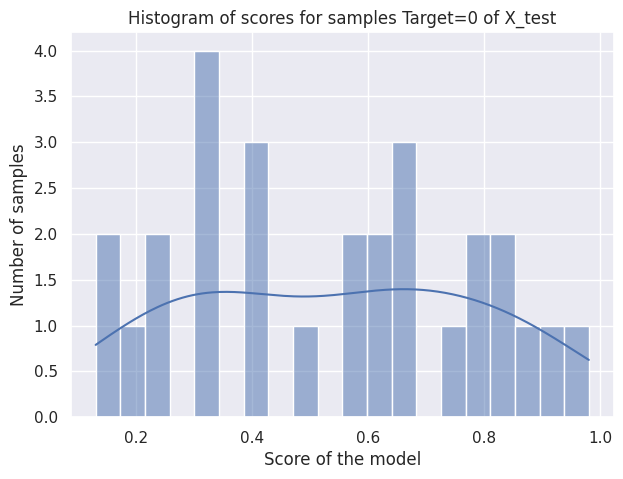

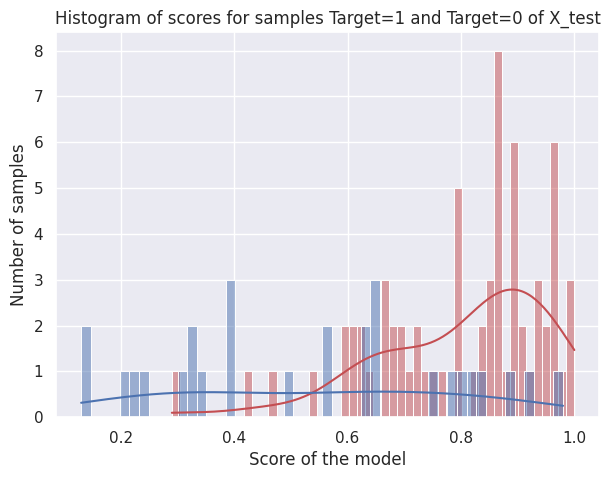

In [ ]:

y_pred_proba_RF=model_RF.predict_proba(X_test)

y_pred_total_RF=np.concatenate((y_pred_proba_RF[:,1].reshape(-1,1),np.asarray(y_test).reshape(-1,1)), axis=1)
y_test_1_RF=y_pred_total_RF[y_pred_total_RF[:,1]=="Y"]
y_test_0_RF=y_pred_total_RF[y_pred_total_RF[:,1]=="N"]

sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(y_test_1_RF[:,0],kde=True, bins=50, color="r")
plt.title('Histogram of scores for samples Target=1 of X_test')
plt.xlabel('Score of the model')
plt.ylabel('Number of samples')
plt.show()

sns.histplot(y_test_0_RF[:,0],kde=True, bins=50, color="b")
plt.title('Histogram of scores for samples Target=0 of X_test')
plt.xlabel('Score of the model')
plt.ylabel('Number of samples')
plt.show()

sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(y_test_1_RF[:,0],kde=True, bins=50, color="r")
plt.title('Histogram of scores for samples Target=1 and Target=0 of X_test')
sns.histplot(y_test_0_RF[:,0],kde=True, bins=50, color="b")
plt.xlabel('Score of the model')
plt.ylabel('Number of samples')
plt.show()

**[EX34]** As the dataset has more samples for class "Y" than for class "N", the training process might be affected by the unbalanced scenario. Random Forest's `class_weight`="balanced" will fix it. Train a new RF model including `class_weight`="balanced". Has the RF's performance improved? Is the unbalanced class affecting the performace?

### Boosting ensemble: Gradient Tree Boosting

[**EX35**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.